### Below used for debugging individual circuit runs


In [2]:
from qiskit.circuit.library import QuantumVolume, EfficientSU2, TwoLocal, QFT
from qiskit import QuantumCircuit
from qiskit.circuit.library.standard_gates import iSwapGate, CXGate
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import FakeQuitoV2
from qiskit.transpiler.coupling import CouplingMap
from qiskit.extensions import UnitaryGate
from weylchamber import canonical_gate
import logging

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
# transpile_benchy_logger.setLevel(logging.DEBUG)
# transpile_benchy_logger.setLevel(logging.INFO)
transpile_benchy_logger.setLevel(logging.WARNING)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)

In [3]:
# 2Q Gate Costs:
# CX: {CX:1, sqiswap:2}
# qc = TwoLocal(
#     num_qubits=4,
#     rotation_blocks="ry",
#     entanglement_blocks=CXGate(),
#     entanglement="full",
#     reps=1,
# )

# # CPHASE(pi/2): {CX:2, sqiswap:2}
# qc = TwoLocal(num_qubits=4,  rotation_blocks='ry', entanglement_blocks = CXGate().power(1/2), entanglement='full', reps=2)

# # iswap: {CX:2, sqiswap:2}
# qc = TwoLocal(num_qubits=4, rotation_blocks='ry', entanglement_blocks = iSwapGate(), entanglement='full', reps=2)

# # ECP: {CX:3, sqiswap:2}
# ecp = UnitaryGate(canonical_gate(0.5, 0.25, 0.25).full())
# qc = TwoLocal(
#     num_qubits=4,
#     rotation_blocks="ry",
#     entanglement_blocks=ecp,
#     entanglement="full",
#     reps=1,
# )

# SqiSwap: {CX:2, sqiswap:1}
# qc = TwoLocal(num_qubits=4, rotation_blocks='ry', entanglement_blocks= iSwapGate().power(1/2), entanglement='full', reps=2)

# qc = QFT(4)

# qc = QuantumCircuit(3)
# qc.ccx(0,1,2)
# qc.cx(0,1)
# qc.cx(0,2)

# qc.decompose().draw("mpl", fold=-1)

In [4]:
N = 8
# coupling_map = FakeQuitoV2().target.build_coupling_map()
# coupling_map = CouplingMap.from_grid(4,4)
coupling_map = CouplingMap.from_line(N)
# coupling_map = CouplingMap.from_heavy_hex(7)
# coupling_map.draw()

In [5]:
# from qiskit import qft
from qiskit.circuit.library import QFT

qc = QFT(N)

In [6]:
# from transpile_benchy.interfaces.abc_interface import MQTBench

# filter_list = ["\\bqaoa"]  # , "grover-v-chain", " "\\bvqe",
# # filter_list = None
# mqt_bench = MQTBench(num_qubits=N, filter_list=filter_list)
# qc = next(mqt_bench.get_quantum_circuits())

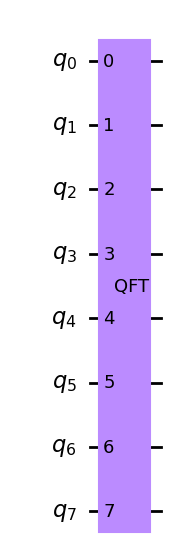

In [7]:
# qc = qc.decompose().decompose()
qc.draw("mpl", fold=-1)

In [8]:
# import numpy as np
# qc = QuantumCircuit(2)
# qc.u(np.pi/2, 0.394, 0, 1)
# qc.u(0.841, np.pi/2, 0, 1)
# qc.cx(0,1)
# qc.u(np.pi, -2.97, 1.74, 0)
# qc.u(1.42, -1.01, 2.07, 1)
# qc.cx(0,1)
# qc.u(np.pi/2, -np.pi/2, 3, 0)
# qc.u(2.58, -2.67, 3.04, 1)
# from mirror_gates.utilities import FastConsolidateBlocks
# from qiskit.transpiler.passes import Collect2qBlocks, Unroll3qOrMore, ConsolidateBlocks
# from qiskit.transpiler import PassManager
# pm = PassManager([Unroll3qOrMore(), FastConsolidateBlocks()])
# # pm = PassManager([Unroll3qOrMore(), Collect2qBlocks(), ConsolidateBlocks(force_consolidate=True)])
# cons_qc = pm.run(qc)
# cons_qc.draw("mpl", fold=-1)
# from weylchamber import c1c2c3
# [c1c2c3(instr.operation.to_matrix()) for instr in cons_qc]

In [9]:
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from transpile_benchy.metrics.depth_metric import DepthMetric

runner = SabreMS(
    coupling_map, cx_basis=False, parallel=False, logger=transpile_benchy_logger
)
metric = DepthMetric()
runner.append_metric_pass(metric)
runner.run(qc)
print(runner.property_set["accepted_subs"])
print(runner.property_set["monodromy_depth"])
# display(runner.property_set['pre'].draw('mpl'))
# display(runner.property_set["mid"].draw("mpl", fold=-1))
# display(runner.property_set['post0'].draw('mpl'))
# display(runner.property_set['post'].draw('mpl', fold=-1))
# display(transp.draw(output="mpl", fold=-1))

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
0.9629629629629629
18.5


In [12]:
%load_ext snakeviz
import cProfile

# Profile 'your_function' and write the result into 'my_profile.profile'
cProfile.run("runner.run(qc)", "my_profile2.prof")
# !snakeviz 'src/notebooks/my_profile.profile'

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [69]:
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from transpile_benchy.metrics.depth_metric import DepthMetric

runner = QiskitLevel3(coupling_map, cx_basis=False)
metric = DepthMetric()
runner.append_metric_pass(metric)
transp = runner.run(qc)
print(runner.property_set["monodromy_depth"])
# display(transp.draw(output="mpl", fold=-1))
# display(runner.property_set['post'].draw('mpl'))

31.0


In [70]:
# from qiskit import transpile

# q = transpile(
#     qc, basis_gates=["u", "cx", "swap"], optimization_level=3)#, coupling_map=coupling_map)
# # q.draw("mpl", fold=-1)